## Human Stress Detection 

In [2]:
import numpy as np
import pandas as pd

#### Loading the Dataset

In [6]:
df = pd.read_csv("dataset.csv")
df.head()

,sr,rr,t,lm,bo,rem,sh,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


Dataset Attributes: sr: snoring rate, rr: respiration rate, t: body temperature, lm: limb movement, bo: body oxygen level, rem: rapid eye movement, sh: sleeping hours, hr: heart rate, sl: stress level

### EDA (Exploratory Data Analysis)

In [7]:
df.isnull().sum()

sr     0
rr     0
t      0
lm     0
bo     0
rem    0
sh     0
hr     0
sl     0
dtype: int64

In [9]:
df.describe()

,sr,rr,t,lm,bo,rem,sh,hr,sl
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sh      630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


#### Distribution of individual features

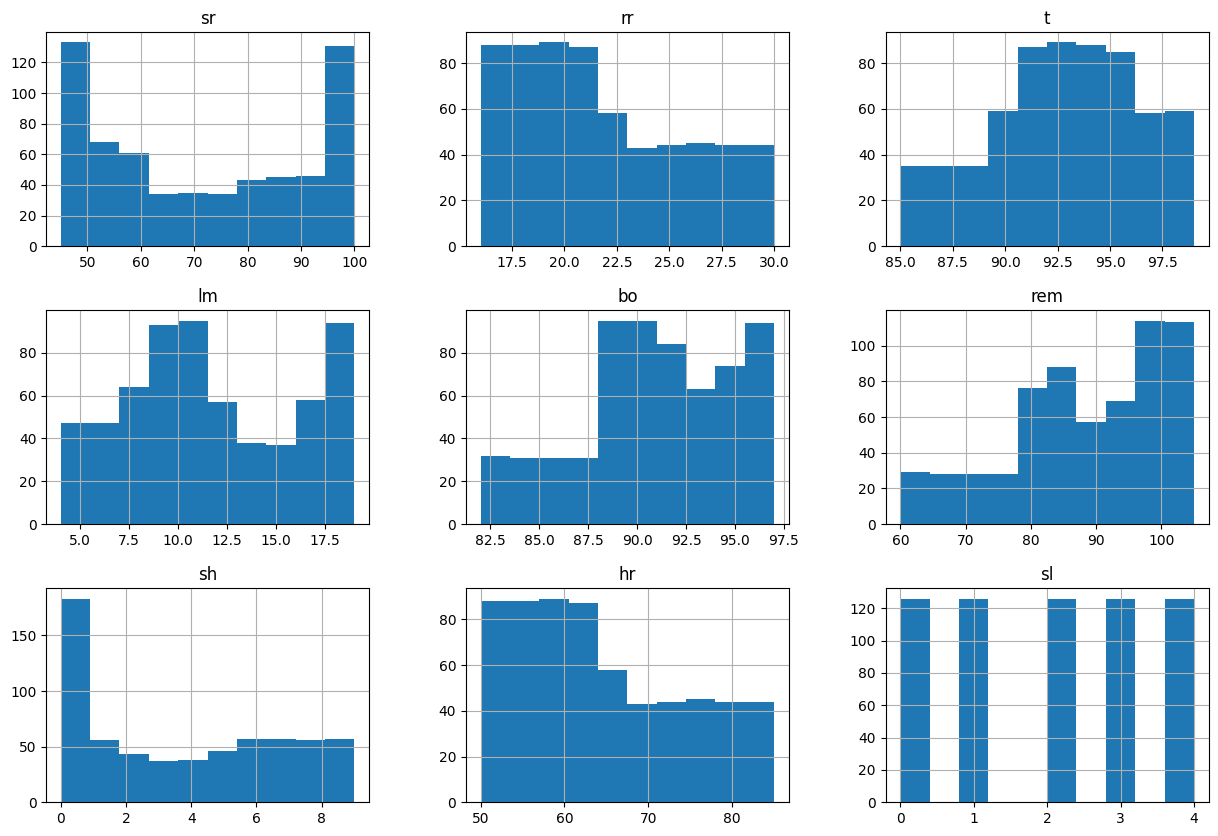

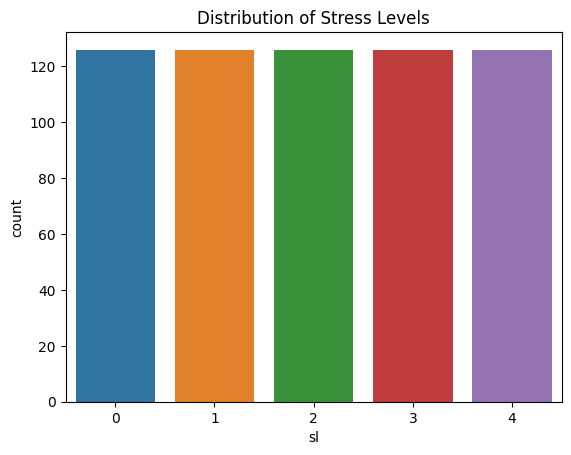

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting histograms for numerical features
df.hist(figsize=(15, 10))
plt.show()

# Plotting the distribution of the 'stress level' (target variable)
sns.countplot(x='sl', data=df)
plt.title('Distribution of Stress Levels')
plt.show()


#### Correlation between the variables

C:\Users\Ketan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


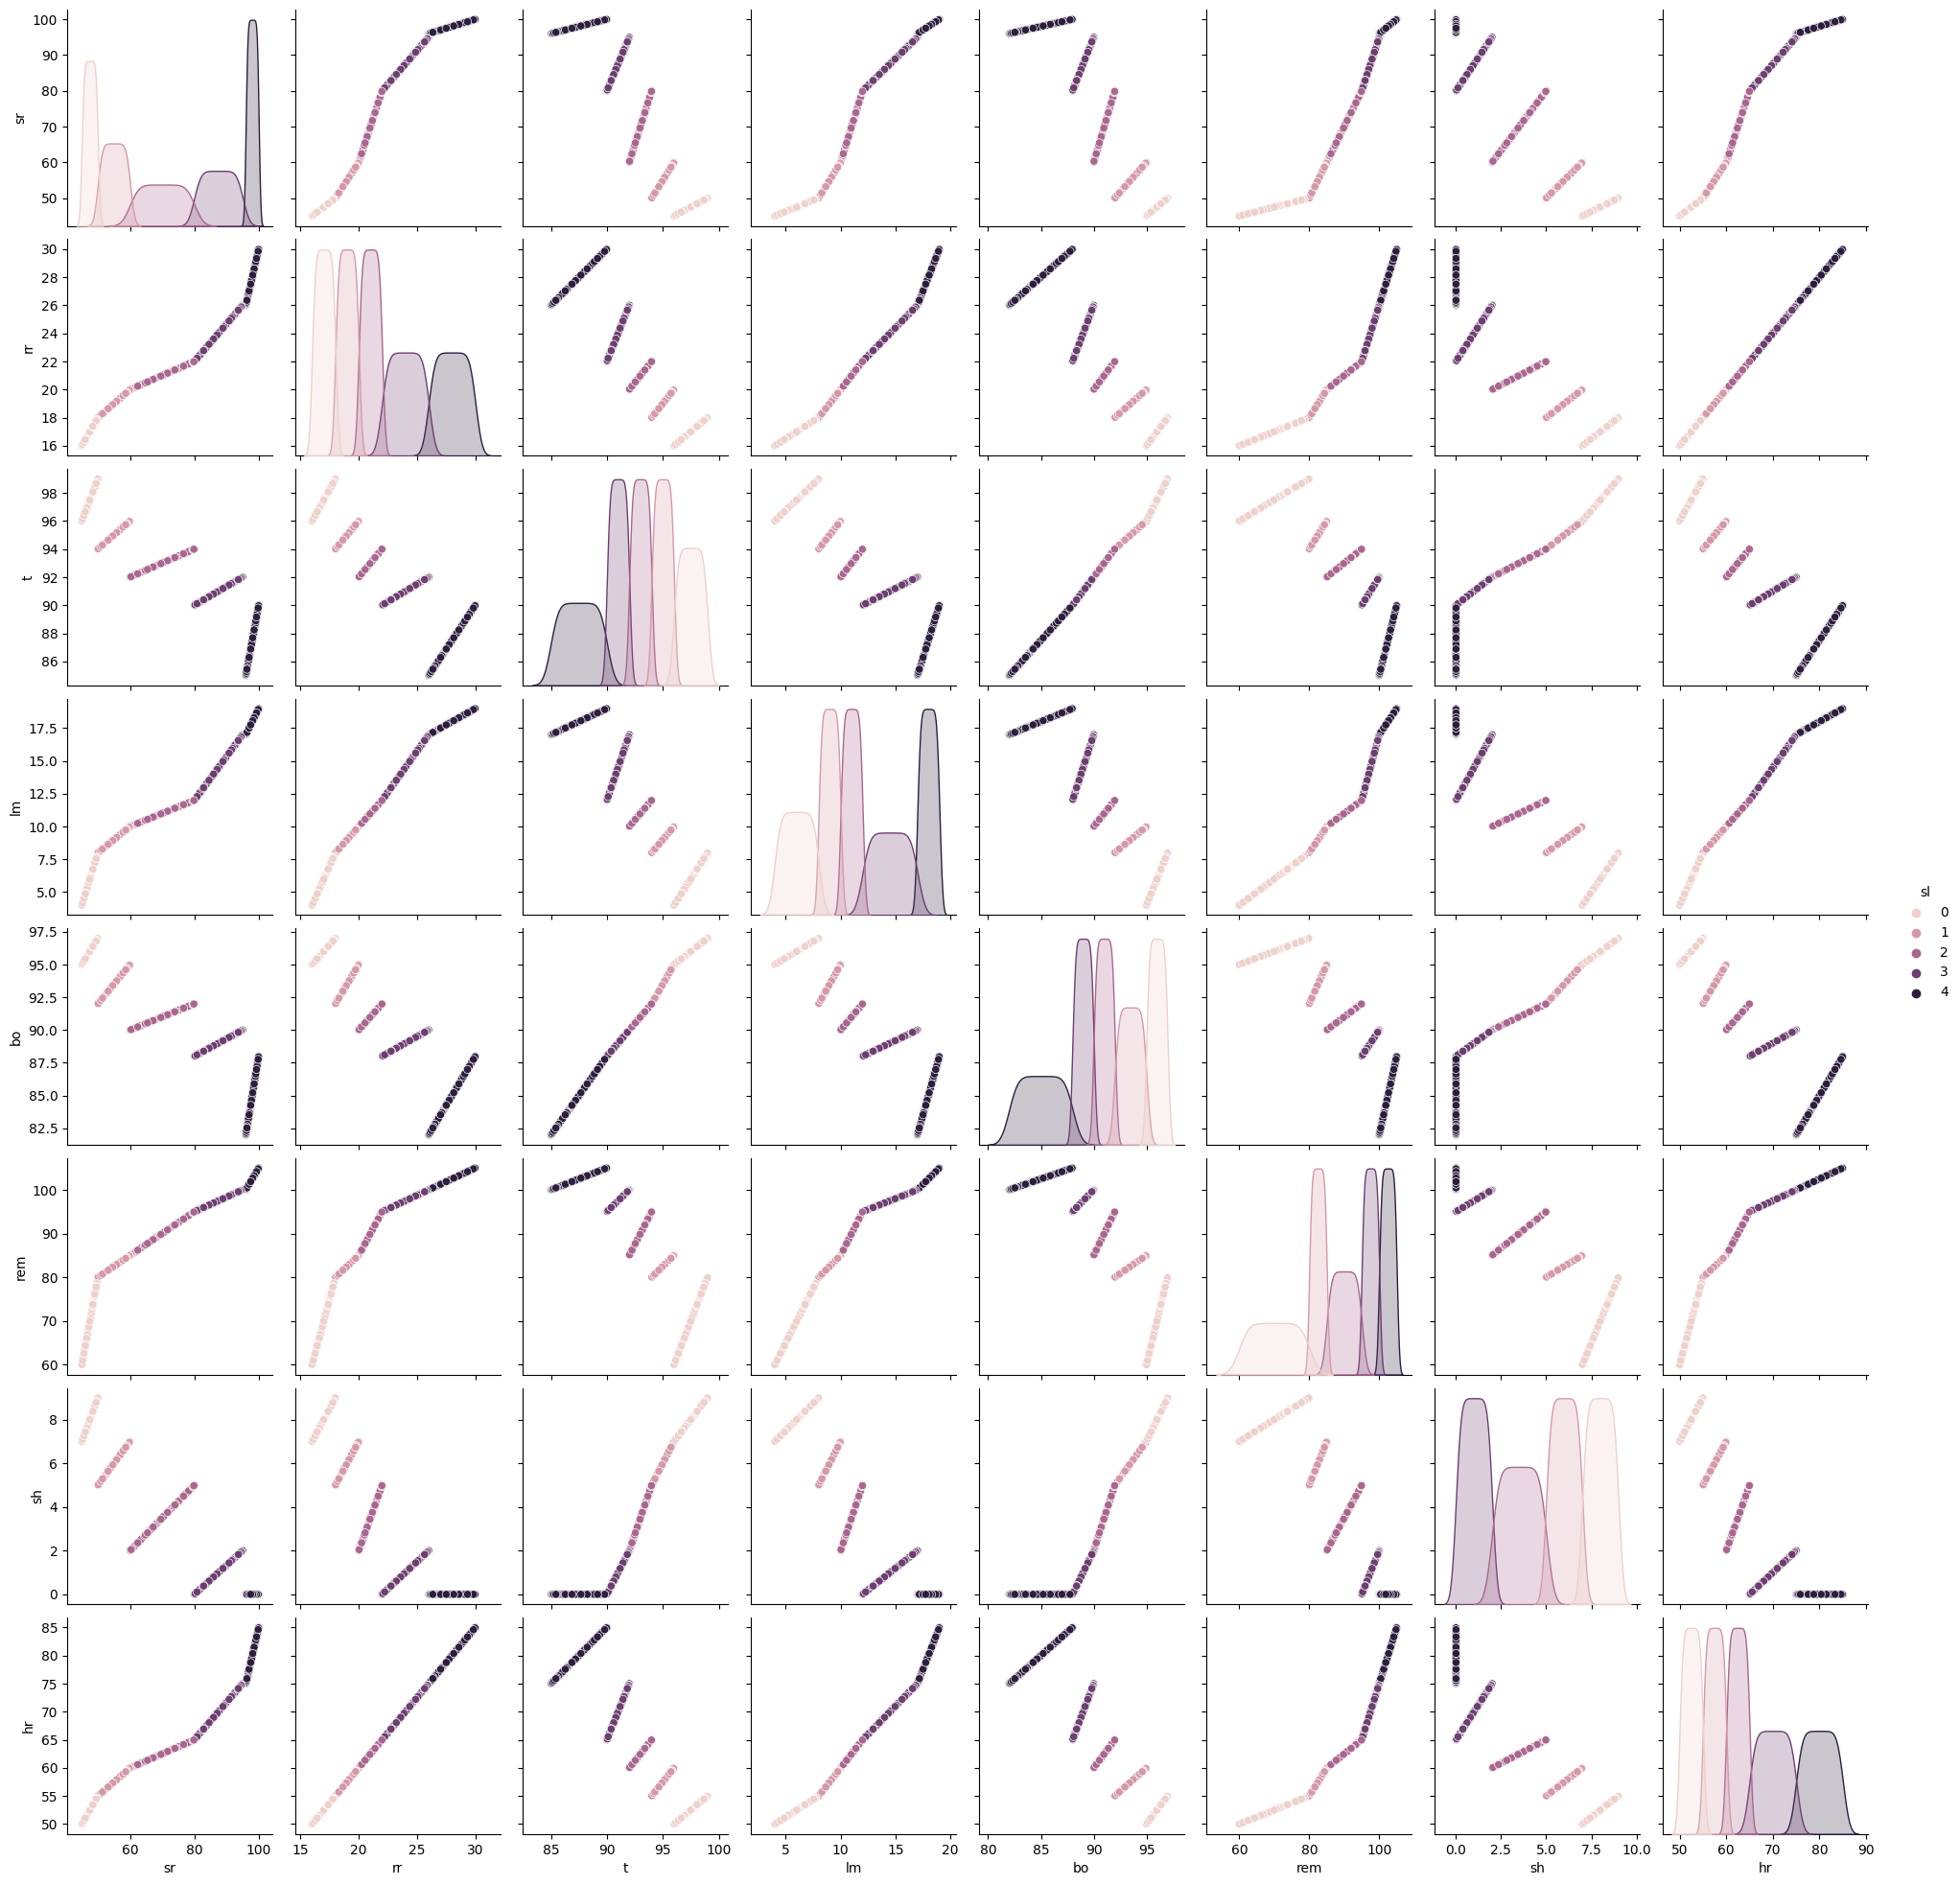

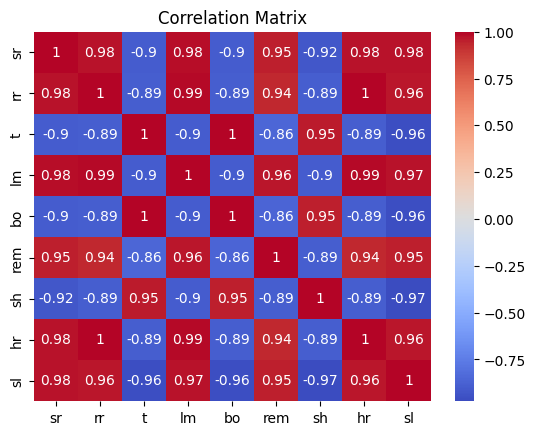

In [12]:
# Pairplot to explore relationships between features
sns.pairplot(df, hue='sl', diag_kind='kde')
plt.show()

# Correlation matrix to identify relationships between numerical features
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### Outlier Detection

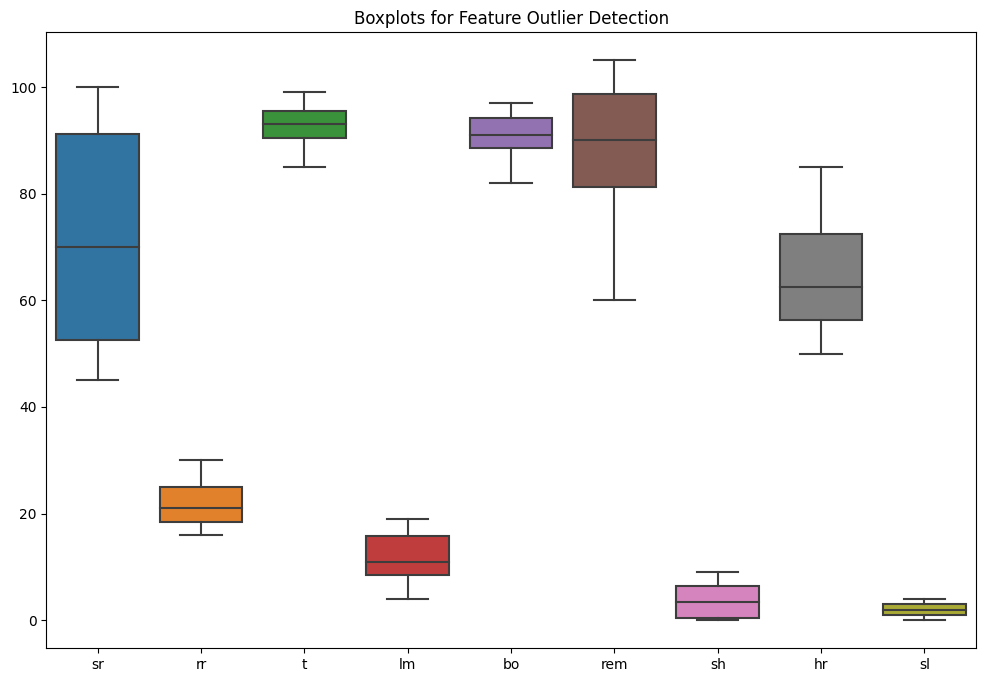

In [14]:
# Boxplot for outlier detection
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Boxplots for Feature Outlier Detection')
plt.show()

### Model Training

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [16]:
# Features and target variable
X = df.drop(['sl'], axis=1)
y = df['sl']

In [17]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Create a dictionary of classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [19]:
# Iterate over classifiers and train them
for name, clf in classifiers.items():
    # Create a pipeline with preprocessing and classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    print(f'Classifier: {name}')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('-' * 30)

Classifier: Random Forest
Accuracy: 0.9761904761904762
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.92      0.96        24
           2       0.97      1.00      0.98        28
           3       1.00      0.96      0.98        26
           4       0.96      1.00      0.98        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126

------------------------------
Classifier: Logistic Regression
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126

In [20]:
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [23]:
# Predict on test set
pred = model.predict(X_test)

In [24]:
# Calculate metrics
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')

In [25]:
# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9920634920634921
Precision: 0.9923687423687424
Recall: 0.9920634920634921
F1 Score: 0.9920634920634921


In [26]:
import pickle
from sklearn.ensemble import RandomForestClassifier
# Save the model to a file
with open('stress_detection.pkl', 'wb') as file:
    pickle.dump(model, file)

In [27]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to view the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

  Feature  Importance
0      sr    0.145038
6      sh    0.133524
4      bo    0.132449
7      hr    0.132056
5     rem    0.125645
2       t    0.124221
3      lm    0.110695
1      rr    0.096373


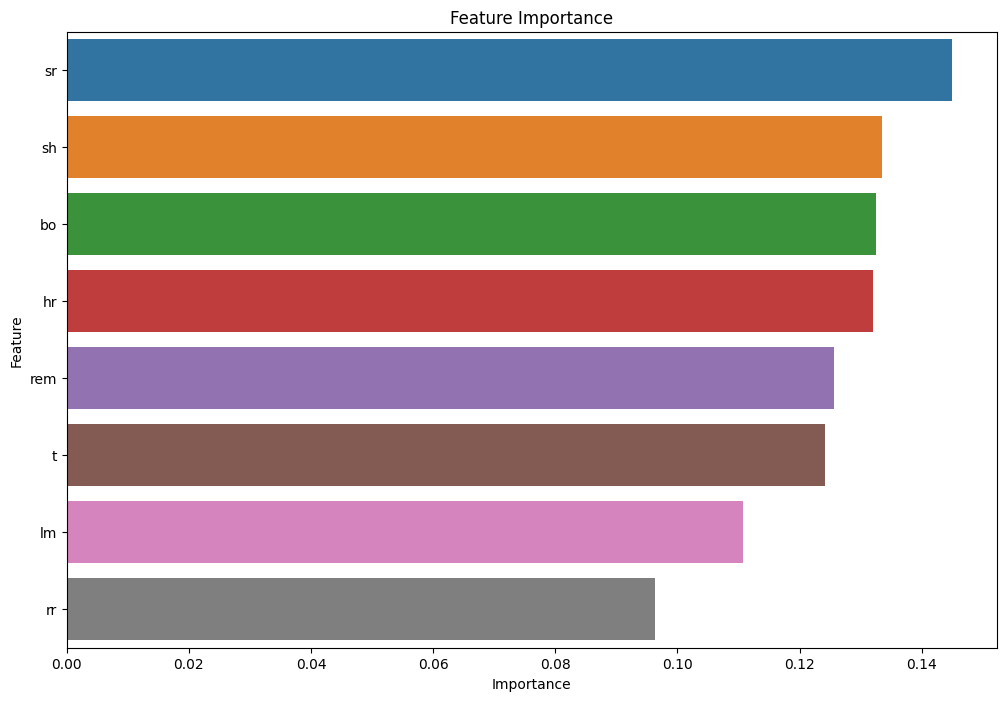

In [28]:
# Assuming you have trained a RandomForestClassifier model
importances = model.feature_importances_
features = df.columns[:-1]  # Excluding the target column
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
sns.barplot(x=importances[sorted_indices], y=np.array(features)[sorted_indices])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()